In [60]:
import numpy as np
import pandas as pd
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("bmh")
plt.rcParams['font.family'] = 'DejaVu Sans'

import scipy.stats as ss
from arch import arch_model 

In [61]:
import yfinance as yf

cur = yf.download('RUB=X','2017-01-01','2020-10-05')
cur

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,61.231300,61.545898,61.155399,61.231300,61.231300,0
2017-01-03,61.228298,61.228298,60.332401,61.228298,61.228298,0
2017-01-04,60.923000,61.145802,60.471100,60.923000,60.923000,0
2017-01-05,60.363899,60.409500,59.152199,60.365002,60.365002,0
2017-01-06,59.401199,59.721600,59.091400,59.401199,59.401199,0
...,...,...,...,...,...,...
2020-09-28,78.103798,79.153999,78.001999,78.103798,78.103798,0
2020-09-29,79.183502,79.939003,78.456001,79.161400,79.161400,0
2020-09-30,78.964699,79.325996,77.553802,78.965103,78.965103,0


In [62]:
#cur.loc['2015-12-31':'2016-01-31']
#cur['Adj Close'].loc['2016-01-06']=74.027496
#cur.loc['2015-12-31':'2016-01-31']

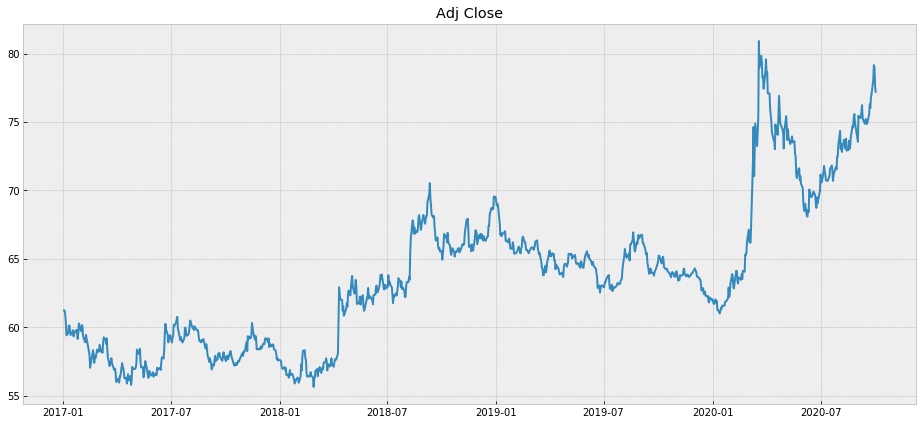

In [63]:
plt.figure(figsize=(16,7))
plt.plot(cur['Adj Close'], label="Adj Close")
plt.title("Adj Close")
plt.show()

In [64]:
ret = cur['Adj Close'].pct_change()
cur['Returns'] = ret
cur

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2017-01-02,61.231300,61.545898,61.155399,61.231300,61.231300,0,NaN
2017-01-03,61.228298,61.228298,60.332401,61.228298,61.228298,0,-0.000049
2017-01-04,60.923000,61.145802,60.471100,60.923000,60.923000,0,-0.004986
2017-01-05,60.363899,60.409500,59.152199,60.365002,60.365002,0,-0.009159
2017-01-06,59.401199,59.721600,59.091400,59.401199,59.401199,0,-0.015966
...,...,...,...,...,...,...,...
2020-09-28,78.103798,79.153999,78.001999,78.103798,78.103798,0,0.013987
2020-09-29,79.183502,79.939003,78.456001,79.161400,79.161400,0,0.013541
2020-09-30,78.964699,79.325996,77.553802,78.965103,78.965103,0,-0.002480


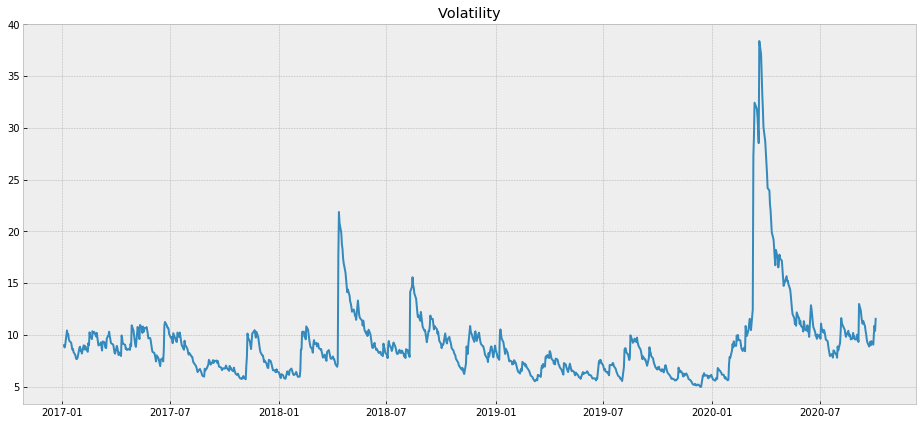

In [65]:
ret=cur['Returns'].dropna()
scaling_const = 10.0 / ret.std()
mdl = arch_model(scaling_const*ret, mean='HARX', lags=1, vol='GARCH', p=1,o=0,q=1, dist='t')
res=mdl.fit(disp='off')
res.conditional_volatility
plt.figure(figsize=(16,7))
plt.plot(res.conditional_volatility, label="Volatility")
plt.title("Volatility")
plt.show()

In [66]:
res.conditional_volatility[-1]

11.53648462514982

100
100


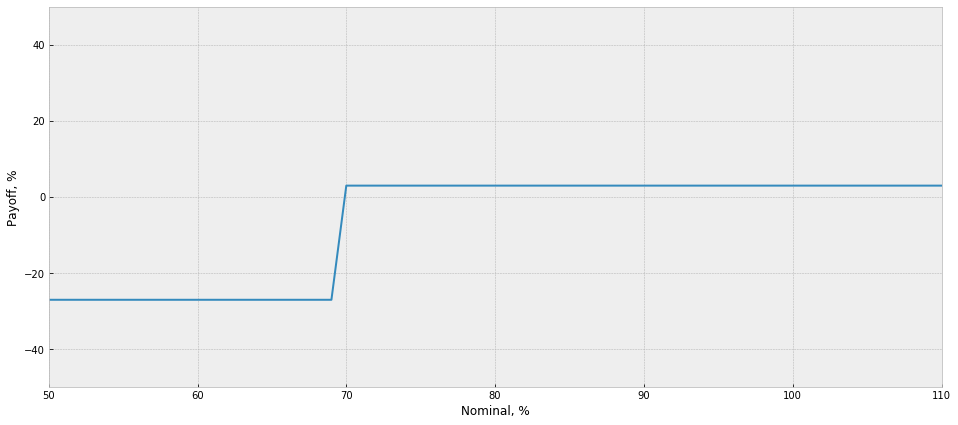

In [67]:
plt.figure(figsize=(16,7))
plt.xlabel("Nominal, %")
plt.ylabel("Payoff, %")
plt.xlim((50,110))
plt.ylim(-50,50)
x=np.arange(100)
print(len(x))
y=np.arange(100)
print(len(y))
for i in range(100):
    x[i]=50+x[i] 
    if i<20:
        y[i]=-30+p
    else:
         y[i]=p   
plt.plot(x,y)
plt.show()

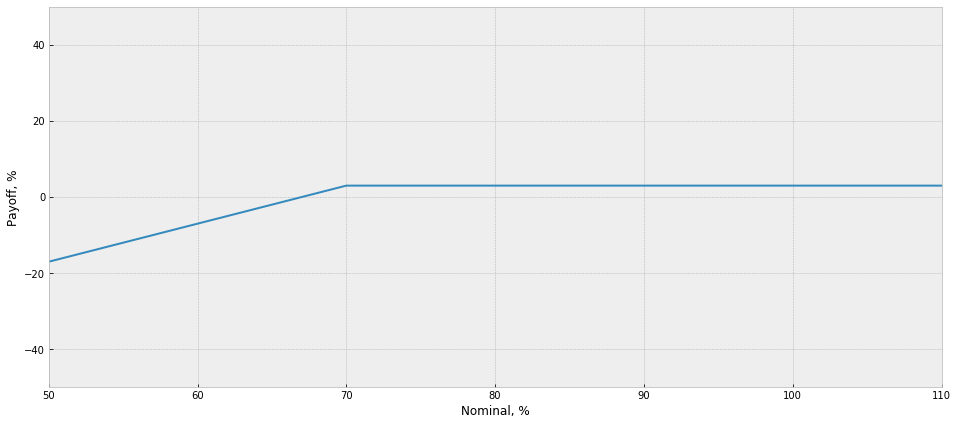

In [74]:
plt.figure(figsize=(16,7))
plt.xlabel("Nominal, %")
plt.ylabel("Payoff, %")
plt.xlim((50,110))
plt.ylim(-50,50)
x=np.arange(100)
y=np.arange(100)
p=3
for i in range(100):
    x[i]=50+x[i]
    if i<20:
        y[i]=i-20+p
    else:
        y[i]=p
#print(y)
plt.plot(x,y)
plt.show()